In [1]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [7]:
#import data dari drive bernama iris.csv
URL = 'https://drive.google.com/file/d/1T28QsQNOCHeqGcOUp58q8RjGeXRB69l6/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# cek 5 data dari bawah
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
#cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
#cek bentuk dari data iris
df.shape

(150, 5)

In [14]:
#cek kolom dari data iris
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
#cek deskripsi data iris
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


keterangan:
1. Minimum and maximum value of sepal length is 4.3 and 7.9.
2. Minimum and maximum value of sepal width is 2 and 4.4
3. Minimum and maximum value of petal length is 1 and 6.9
4. Minimum and maximum value of petal width is 0.1 and 2.5

In [16]:
#cek spesies data iris dengan count plot
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


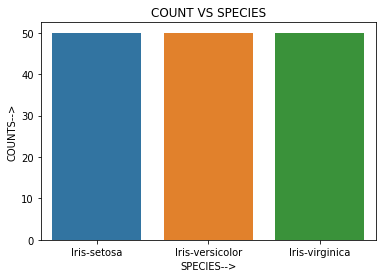

In [37]:
import seaborn as sns
#cek jumlah spesies iris 
sns.countplot(df['species'])
plt.xlabel('SPECIES-->')
plt.ylabel('COUNTS-->')
plt.title('COUNT VS SPECIES')
plt.show()

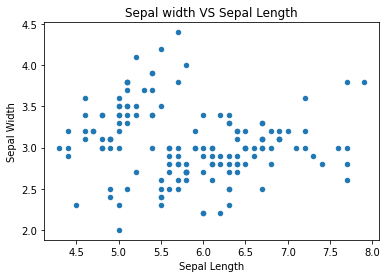

In [36]:
#cek data iris dengan 2-D Scatter Plot
df.plot(kind='scatter',x='sepal_length',y='sepal_width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal width VS Sepal Length')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


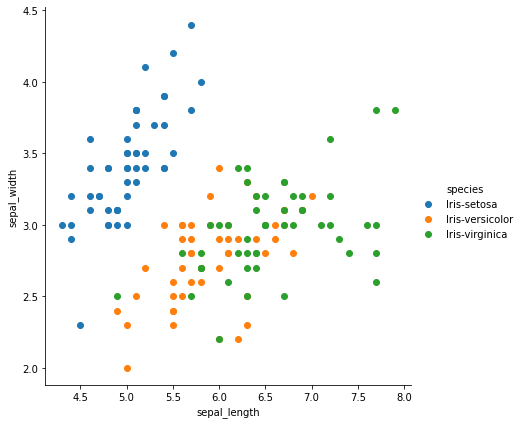

In [30]:
#cek persebaran spesies iris dengan warna dengan sepal
sns.FacetGrid(df, hue = 'species', size=6).map(plt.scatter, 'sepal_length','sepal_width').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


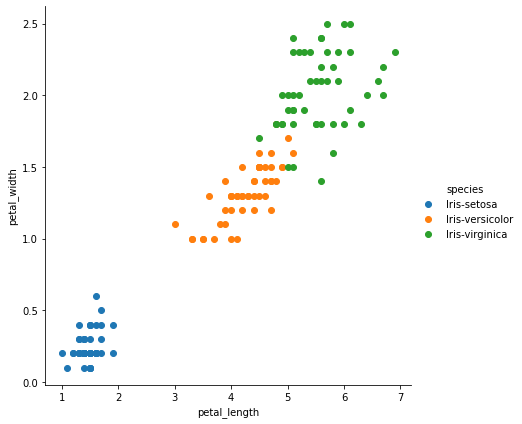

In [31]:
#cek persebaran spesies iris dengan warna dengan petal
sns.FacetGrid(df, hue = 'species', size=6).map(plt.scatter, 'petal_length','petal_width').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


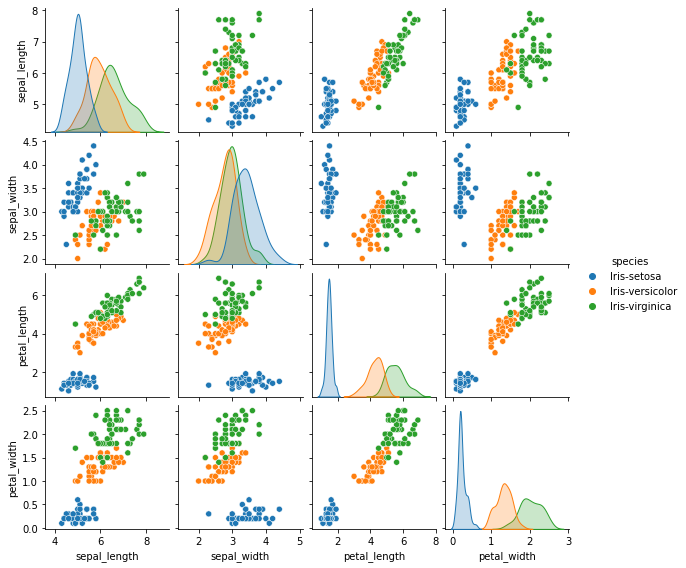

In [21]:
#cek plot data iris dengan Pair-Plots
sns.pairplot(df,hue='species',size=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

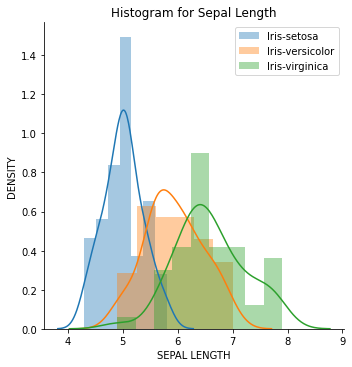

In [32]:
# histogram dengan sepal lenght
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"sepal_length")
plt.title("Histogram for Sepal Length")
plt.xlabel('SEPAL LENGTH')
plt.ylabel('DENSITY')
plt.legend()
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

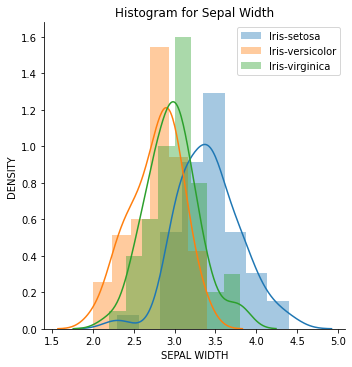

In [33]:
# histogram dengan sepal width
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"sepal_width")
plt.title("Histogram for Sepal Width")
plt.xlabel('SEPAL WIDTH')
plt.ylabel('DENSITY')
plt.legend()
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

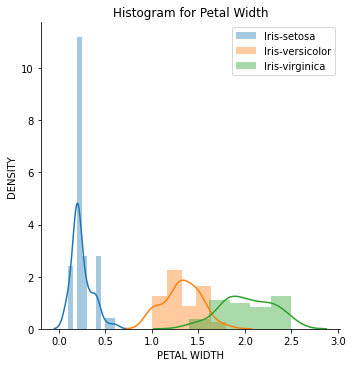

In [34]:
# histogram dengan petal width
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"petal_width")
plt.title("Histogram for Petal Width")
plt.xlabel('PETAL WIDTH')
plt.ylabel('DENSITY')
plt.legend()
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

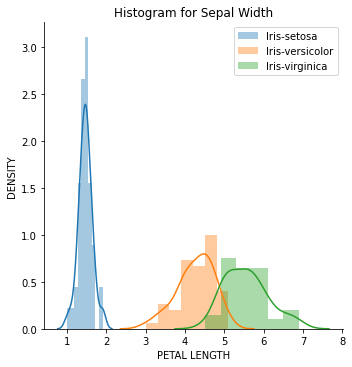

In [35]:
# histogram dengan petal length
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"petal_length")
plt.title("Histogram for Sepal Width")
plt.xlabel('PETAL LENGTH')
plt.ylabel('DENSITY')
plt.legend()
plt.show();

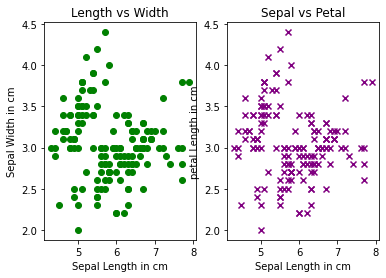

In [39]:
#cek perbandingan antara lenght dengan width dan sepal dengan petal
plt.subplot(1, 2, 1)
plt.scatter(x = df['sepal_length'], y = df['sepal_width'], color = 'green', marker = 'o',)
plt.title('Length vs Width')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')

plt.subplot(1, 2, 2)
plt.scatter(x = df['sepal_length'], y = df['sepal_width'], color = 'purple', marker = 'x',)
plt.title('Sepal vs Petal')
plt.xlabel('Sepal Length in cm')
plt.ylabel('petal Length in cm')
plt.show()

menggunakan jaringan syaraf tiruan untuk menyelesaiakan dataset iris

In [60]:
# menggunakan Multi Layer Perceptron
import tensorflow as tf
model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)


training accuracy : 0.975
testing accuracy : 0.9666666666666667
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [61]:
from sklearn.linear_model import Perceptron

model = Perceptron()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Misclassified Samples : %d" %(y_test != y_pred).sum())

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix :",cm)

Misclassified Samples : 1
Training Accuracy : 0.9583333333333334
Testing Accuracy : 0.9666666666666667
Confusion Matrix : [[11  0  0]
 [ 0 13  1]
 [ 0  0  5]]
